In [2]:
import plotnine as gg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
# Ignore some deprecation warnings from plotnine 
# using deprecated numpy functions in matplotlib
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings("ignore",category=FutureWarning)

# Plotnine

_plotnine is an implementation of a grammar of graphics in Python, it is based on ggplot2. The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot._ - [Plotnine Official Website](https://plotnine.readthedocs.io/en/stable/)

>Plotting with a grammar is powerful, it makes custom (and otherwise complex) plots are easy to think about and then create, while the simple plots remain simple.

Let's take a create a quick example using the `mtcars` dataset.

In [3]:
DATASET_URL = 'https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv'
mtcars = pd.read_csv(DATASET_URL).rename(columns={'Unnamed: 0': 'brand'})

mtcars.head()

,brand,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Scatter Plot

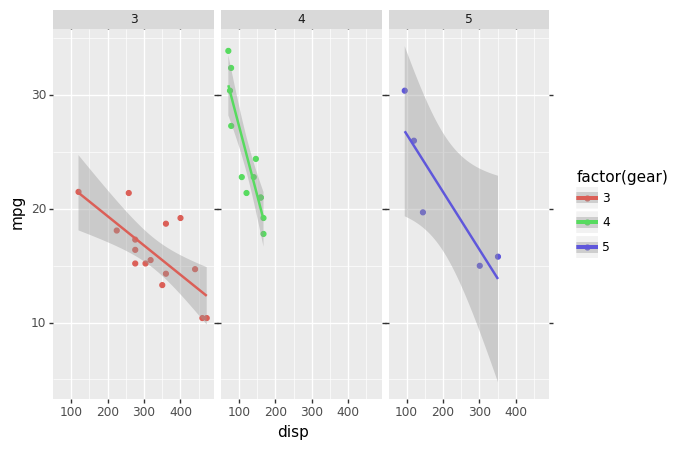

<ggplot: (-9223371849348229408)>

In [15]:
(gg.ggplot(mtcars, gg.aes('disp', 'mpg', color='factor(gear)'))
 + gg.geom_point()
 + gg.geom_smooth(method="lm")
 + gg.facet_wrap("~gear"))

The equivalent in plain matplotlib would be

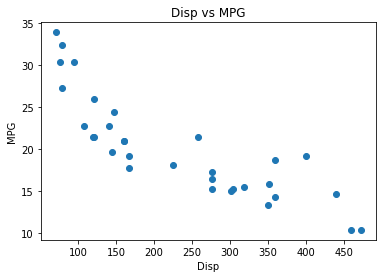

In [10]:
plt.scatter(mtcars['disp'], mtcars['mpg'])
plt.xlabel('Disp')
plt.ylabel('MPG')
plt.title('Disp vs MPG')
plt.show()

## Box Plot

Let's build a boxplot, and see the distribution of horspower on wether a car is automatic or manual

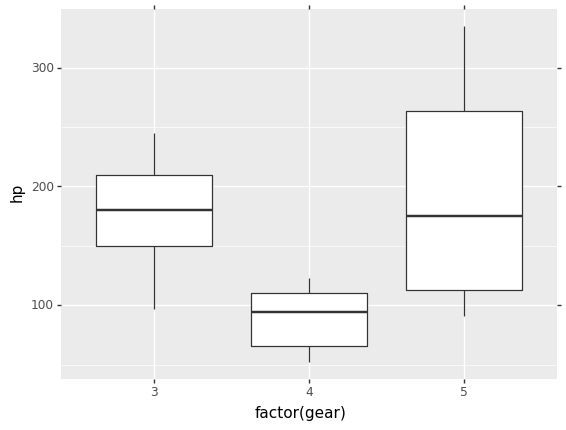

<ggplot: (-9223371849349535196)>

In [11]:
(gg.ggplot(mtcars, gg.aes(y='hp', x='factor(gear)'))
 + gg.geom_boxplot())

The matplotlib equivalent

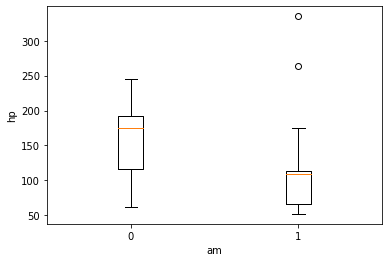

In [34]:
auto_tmission = mtcars.loc[lambda df: df['am'] == 0].hp
man_tmission = mtcars.loc[lambda df: df['am'] == 1].hp

fig, axes = plt.subplots()
axes.set(xticklabels=['0', '1',], xlabel='am', ylabel='hp')
axes.boxplot([auto_tmission, man_tmission])

plt.show()

## Bar Chart

Let's plot the weight of each brand 

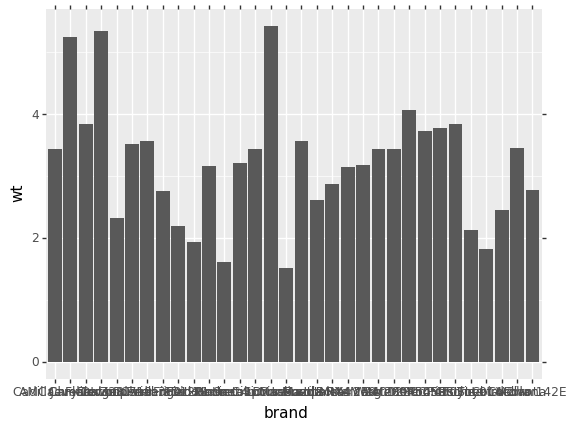

<ggplot: (-9223371906734255728)>

In [40]:
(gg.ggplot(mtcars, gg.aes(x='brand', y='wt'))
    + gg.geom_bar(stat='identity'))


The matplotlib equivalent

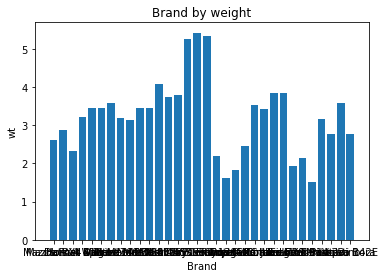

In [42]:
plt.bar(mtcars['brand'], mtcars['wt'])
plt.xlabel('Brand')
plt.ylabel('wt')
plt.title('Brand by weight')
plt.show()

The brands are all quished together, let's try making the bar graph horizontal 

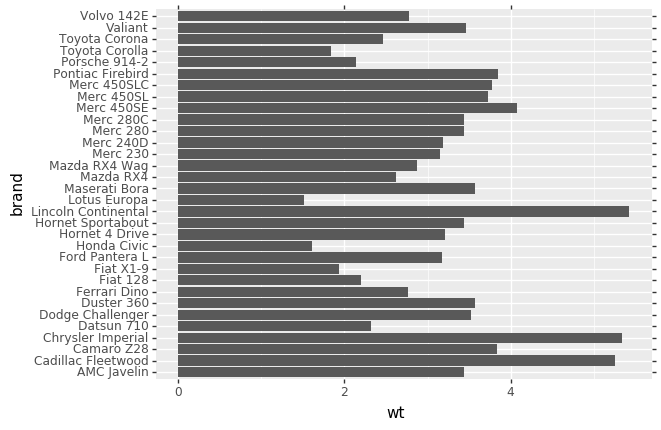

<ggplot: (-9223371906733997520)>

In [41]:
(gg.ggplot(mtcars, gg.aes(x='brand', y='wt'))
    + gg.geom_bar(stat='identity')
    + gg.coord_flip())

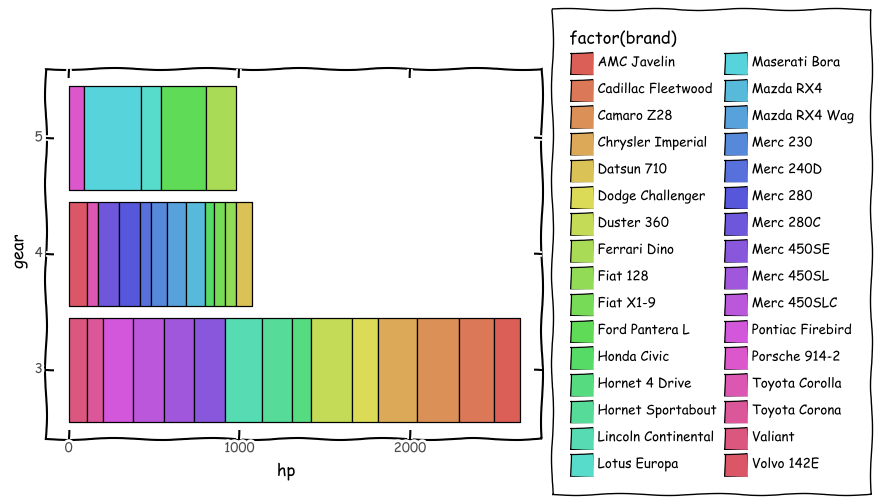

<ggplot: (-9223371849348881064)>

In [35]:
(gg.ggplot(mtcars, gg.aes(x='gear', y='hp', fill="factor(brand)"))
    + gg.geom_bar(stat='identity', color="black")
    + gg.coord_flip()
    + gg.theme_xkcd())

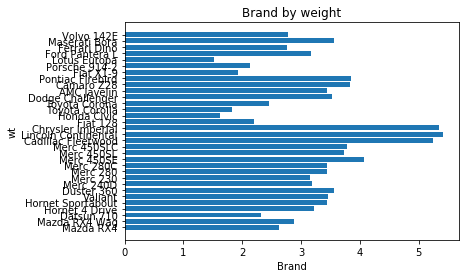

In [43]:
plt.barh(mtcars['brand'], mtcars['wt'])
plt.xlabel('Brand')
plt.ylabel('wt')
plt.title('Brand by weight')
plt.show()

## Histogram

Let's look at the distribution of weight for all the cars

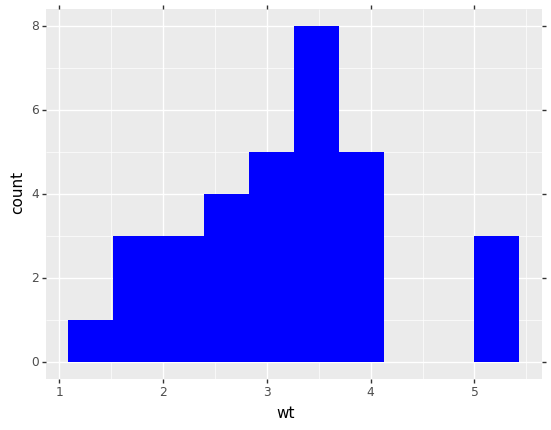

<ggplot: (-9223371921100933236)>

In [31]:
(gg.ggplot(mtcars, gg.aes(x='wt'))
    + gg.geom_histogram(bins=10, fill="blue"))

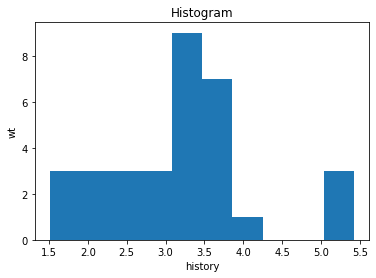

In [15]:
plt.hist(mtcars['wt'], 10)
plt.xlabel('history')
plt.ylabel('wt')
plt.title('Histogram')
plt.show()

## Pie Chart

Let's see the most common gear in this dataset

Unfortunately, the function `coord_polar` which is needed to created piecharts is not in the plotnine API, so pie charts:

Check out this [issue](https://github.com/has2k1/plotnine/issues/10) 